In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/지하철_역별OD_20220430.csv', encoding='CP949')

In [4]:
data

기준일자  승차_호선      승차_역  하차_호선      하차_역  총_승객수  일반_승객수  어린이_승객수  \
0       20220430  우이신설선  4.19민주묘지  우이신설선  4.19민주묘지     13       8        0   
1       20220430  우이신설선  4.19민주묘지    8호선      가락시장      1       1        0   
2       20220430  우이신설선  4.19민주묘지    7호선   가산디지털단지      3       2        0   
3       20220430  우이신설선  4.19민주묘지    1호선   가산디지털단지      1       1        0   
4       20220430  우이신설선  4.19민주묘지    9호선        가양      2       0        0   
...          ...    ...       ...    ...       ...    ...     ...      ...   
252413  20220430   의정부선        흥선    4호선        혜화      4       4        0   
252414  20220430   의정부선        흥선    2호선      홍대입구      4       4        0   
252415  20220430   의정부선        흥선  경의중앙선        회기      2       2        0   
252416  20220430   의정부선        흥선   의정부선        회룡      1       1        0   
252417  20220430   의정부선        흥선   의정부선        흥선      1       1        0   

        청소년_승객수  대학생_승객수  경로_승객수  장애인_승객수  국가유공자_승객수  직원_승객수  외국인경로_승객수  
0             1        0       4        0          0       0          0  
1             0        0       0        0          0       0          0  
2             0        0       0        1          0       0          0  
3             0        0       0        0          0       0          0  
4             0        0       2        0          0       0          0  
...         ...      ...     ...      ...        ...     ...        ...  
252413        0        0       0        0          0       0          0  
252414        0        0       0        0          0       0          0  
252415        0        0       0        0          0       0          0  
252416        0        0       0        0          0       0          0  
252417        0        0       0        0          0       0          0  

[252418 rows x 15 columns]

In [5]:
df = data[['승차_역', '하차_역', '총_승객수']]
df.drop_duplicates(subset=['승차_역', '하차_역', '총_승객수'], inplace=True) # 중복 제거

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
G_data = nx.from_pandas_edgelist(data, source='승차_역', target='하차_역', edge_attr='총_승객수', create_using=nx.DiGraph())
print(G_data)

DiGraph with 631 nodes and 198599 edges


In [7]:
G_data.nodes

NodeView(('4.19민주묘지', '가락시장', '가산디지털단지', '가양', '가오리', '강남', '강동', '강동구청', '강변(동서울터미널)', '개롱', '개봉', '거여', '건대입구', '경복궁(정부서울청사)', '경찰병원', '고덕', '고려대(종암)', '고속터미널', '공덕', '공릉(서울과학기술대)', '공항시장', '광나루(장신대)', '광명사거리', '광화문(세종문화회관)', '교대(법원.검찰청)', '구로디지털단지', '구리', '구산', '구의(광진구청)', '구파발', '국회의사당', '굽은다리(강동구민회관앞)', '금정', '금촌', '금호', '길음', '김포공항', '까치산', '낙성대(강감찬)', '남부터미널(예술의전당)', '남성', '남태령', '남한산성입구(성남법원.검찰청)', '내방', '노량진', '노원', '녹번', '녹사평(용산구청)', '논현', '답십리', '당고개', '당산', '대림(구로구청)', '대방', '대치', '대흥(서강대앞)', '도곡', '독립문', '돌곶이', '동대문', '동대문역사문화공원(DDP)', '동대입구', '동묘앞', '동작(현충원)', '둔촌동', '디지털미디어시티', '뚝섬', '뚝섬유원지', '마곡나루(서울식물원)', '마천', '마포', '마포구청', '망원', '매봉', '명동', '모란', '목동', '몽촌토성(평화의문)', '무악재', '문래', '문정', '미사', '미아(서울사이버대학)', '미아사거리', '발산', '버티고개', '보문', '봉은사', '봉천', '봉화산(서울의료원)', '부천', '북한산보국문', '북한산우이', '사가정', '사당', '사평', '산본', '삼각지', '삼성(무역센터)', '삼양', '삼양사거리', '상계', '상도', '상봉(시외버스터미널)', '상수', '상왕십리', '상월곡(한국과학기술연구원)', '상일동', '새절(신사)', '샛강', '서대문', '서울대입구(관악구청)', '서울역', '서초', '석계', '석촌

In [8]:
G_data.edges

OutEdgeView([('4.19민주묘지', '4.19민주묘지'), ('4.19민주묘지', '가락시장'), ('4.19민주묘지', '가산디지털단지'), ('4.19민주묘지', '가양'), ('4.19민주묘지', '가오리'), ('4.19민주묘지', '강남'), ('4.19민주묘지', '강동'), ('4.19민주묘지', '강동구청'), ('4.19민주묘지', '강변(동서울터미널)'), ('4.19민주묘지', '개롱'), ('4.19민주묘지', '개봉'), ('4.19민주묘지', '거여'), ('4.19민주묘지', '건대입구'), ('4.19민주묘지', '경복궁(정부서울청사)'), ('4.19민주묘지', '경찰병원'), ('4.19민주묘지', '고덕'), ('4.19민주묘지', '고려대(종암)'), ('4.19민주묘지', '고속터미널'), ('4.19민주묘지', '공덕'), ('4.19민주묘지', '공릉(서울과학기술대)'), ('4.19민주묘지', '공항시장'), ('4.19민주묘지', '광나루(장신대)'), ('4.19민주묘지', '광명사거리'), ('4.19민주묘지', '광화문(세종문화회관)'), ('4.19민주묘지', '교대(법원.검찰청)'), ('4.19민주묘지', '구로디지털단지'), ('4.19민주묘지', '구리'), ('4.19민주묘지', '구산'), ('4.19민주묘지', '구의(광진구청)'), ('4.19민주묘지', '구파발'), ('4.19민주묘지', '국회의사당'), ('4.19민주묘지', '굽은다리(강동구민회관앞)'), ('4.19민주묘지', '금정'), ('4.19민주묘지', '금촌'), ('4.19민주묘지', '금호'), ('4.19민주묘지', '길음'), ('4.19민주묘지', '김포공항'), ('4.19민주묘지', '까치산'), ('4.19민주묘지', '낙성대(강감찬)'), ('4.19민주묘지', '남부터미널(예술의전당)'), ('4.19민주묘지', '남성'), ('4.19민주묘지', '남태령'), ('4.19민주묘지', '남한산성입

In [9]:
print(G_data.edges(data=True))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
df

승차_역      하차_역  총_승객수
0       4.19민주묘지  4.19민주묘지     13
1       4.19민주묘지      가락시장      1
2       4.19민주묘지   가산디지털단지      3
3       4.19민주묘지   가산디지털단지      1
4       4.19민주묘지        가양      2
...          ...       ...    ...
252413        흥선        혜화      4
252414        흥선      홍대입구      4
252415        흥선        회기      2
252416        흥선        회룡      1
252417        흥선        흥선      1

[247773 rows x 3 columns]

In [11]:
in_degree = G_data.in_degree()
out_degree = G_data.out_degree()
print('in-degree:', in_degree)
print('out-degree:', out_degree)

in-degree: [('4.19민주묘지', 203), ('가락시장', 477), ('가산디지털단지', 575), ('가양', 529), ('가오리', 223), ('강남', 591), ('강동', 517), ('강동구청', 419), ('강변(동서울터미널)', 554), ('개롱', 411), ('개봉', 503), ('거여', 447), ('건대입구', 591), ('경복궁(정부서울청사)', 567), ('경찰병원', 400), ('고덕', 411), ('고려대(종암)', 458), ('고속터미널', 604), ('공덕', 543), ('공릉(서울과학기술대)', 490), ('공항시장', 337), ('광나루(장신대)', 490), ('광명사거리', 563), ('광화문(세종문화회관)', 560), ('교대(법원.검찰청)', 551), ('구로디지털단지', 581), ('구리', 299), ('구산', 408), ('구의(광진구청)', 524), ('구파발', 526), ('국회의사당', 526), ('굽은다리(강동구민회관앞)', 446), ('금정', 404), ('금촌', 244), ('금호', 428), ('길음', 517), ('김포공항', 542), ('까치산', 571), ('낙성대(강감찬)', 548), ('남부터미널(예술의전당)', 545), ('남성', 488), ('남태령', 219), ('남한산성입구(성남법원.검찰청)', 430), ('내방', 497), ('노량진', 582), ('노원', 539), ('녹번', 457), ('녹사평(용산구청)', 504), ('논현', 515), ('답십리', 498), ('당고개', 431), ('당산', 568), ('대림(구로구청)', 590), ('대방', 410), ('대치', 437), ('대흥(서강대앞)', 457), ('도곡', 425), ('독립문', 483), ('돌곶이', 449), ('동대문', 592), ('동대문역사문화공원(DDP)', 568), ('동대입구', 557), (

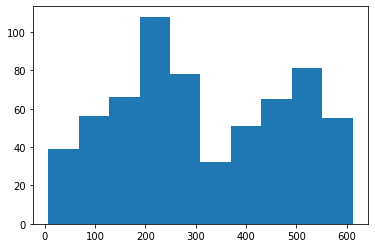

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(in_degree).values())
plt.show()

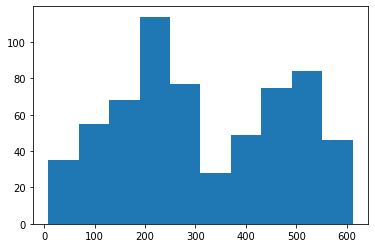

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(out_degree).values())
plt.show()

In [14]:
eig_cen = nx.eigenvector_centrality(G_data)
print('eigenvector centrality: \n',eig_cen)

eigenvector centrality: 
 {'4.19민주묘지': 0.02706667584205913, '가락시장': 0.05223952135950977, '가산디지털단지': 0.05747955271840859, '가양': 0.05568718614203954, '가오리': 0.02991155007835615, '강남': 0.05887608054465749, '강동': 0.055022851499614965, '강동구청': 0.04790717735144952, '강변(동서울터미널)': 0.05735167518433494, '개롱': 0.04656150644874904, '개봉': 0.053003348477812406, '거여': 0.050225653160338286, '건대입구': 0.05886809889481677, '경복궁(정부서울청사)': 0.05761879216438726, '경찰병원': 0.046230138783803804, '고덕': 0.04757801020200965, '고려대(종암)': 0.05027505380823368, '고속터미널': 0.05930683014559223, '공덕': 0.05658584871397284, '공릉(서울과학기술대)': 0.05221714876707813, '공항시장': 0.0379886474456982, '광나루(장신대)': 0.05310974979605374, '광명사거리': 0.0569649390287695, '광화문(세종문화회관)': 0.05739455809605117, '교대(법원.검찰청)': 0.057087906576087755, '구로디지털단지': 0.05829781446503852, '구리': 0.038533554967441284, '구산': 0.0454816797083364, '구의(광진구청)': 0.055720659029404054, '구파발': 0.05577920506980427, '국회의사당': 0.0555452886282149, '굽은다리(강동구민회관앞)': 0.04984696226030782

In [15]:
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:10])

eigenvector centrality:
 [('홍대입구', 0.059464339874703655), ('종로3가', 0.05931544329973614), ('고속터미널', 0.05930683014559223), ('사당', 0.059292158965651265), ('잠실(송파구청)', 0.05925054974974592), ('합정', 0.05906116772547324), ('서울역', 0.05903026421453572), ('신림', 0.05899561628515373), ('신도림', 0.058934112039250884), ('강남', 0.05887608054465749)]


In [16]:
in_deg_cen = nx.in_degree_centrality(G_data)
out_deg_cen = nx.out_degree_centrality(G_data)
print('in-degree centrality: \n',in_deg_cen)
print('out-degree centrality: \n',out_deg_cen)

in-degree centrality: 
 {'4.19민주묘지': 0.32222222222222224, '가락시장': 0.7571428571428571, '가산디지털단지': 0.9126984126984127, '가양': 0.8396825396825397, '가오리': 0.353968253968254, '강남': 0.9380952380952381, '강동': 0.8206349206349206, '강동구청': 0.665079365079365, '강변(동서울터미널)': 0.8793650793650793, '개롱': 0.6523809523809524, '개봉': 0.7984126984126985, '거여': 0.7095238095238096, '건대입구': 0.9380952380952381, '경복궁(정부서울청사)': 0.9, '경찰병원': 0.6349206349206349, '고덕': 0.6523809523809524, '고려대(종암)': 0.726984126984127, '고속터미널': 0.9587301587301588, '공덕': 0.861904761904762, '공릉(서울과학기술대)': 0.7777777777777778, '공항시장': 0.5349206349206349, '광나루(장신대)': 0.7777777777777778, '광명사거리': 0.8936507936507937, '광화문(세종문화회관)': 0.8888888888888888, '교대(법원.검찰청)': 0.8746031746031746, '구로디지털단지': 0.9222222222222223, '구리': 0.4746031746031746, '구산': 0.6476190476190476, '구의(광진구청)': 0.8317460317460318, '구파발': 0.834920634920635, '국회의사당': 0.834920634920635, '굽은다리(강동구민회관앞)': 0.707936507936508, '금정': 0.6412698412698413, '금촌': 0.3873015873015873, '금호'

In [17]:
print('in-degree centrality:\n', sorted(in_deg_cen.items(), key=lambda x:x[1], reverse=True)[0:10])
print('out-degree centrality:\n', sorted(out_deg_cen.items(), key=lambda x:x[1], reverse=True)[0:10])

in-degree centrality:
 [('홍대입구', 0.9714285714285714), ('종로3가', 0.9666666666666667), ('잠실(송파구청)', 0.9634920634920635), ('사당', 0.9603174603174603), ('고속터미널', 0.9587301587301588), ('신림', 0.9523809523809523), ('서울역', 0.9507936507936507), ('신도림', 0.9476190476190476), ('동묘앞', 0.9428571428571428), ('합정', 0.9428571428571428)]
out-degree centrality:
 [('홍대입구', 0.9714285714285714), ('잠실(송파구청)', 0.9571428571428572), ('종로3가', 0.953968253968254), ('신도림', 0.9492063492063492), ('사당', 0.9476190476190476), ('서울역', 0.9476190476190476), ('신림', 0.9444444444444444), ('건대입구', 0.9396825396825397), ('고속터미널', 0.9396825396825397), ('합정', 0.9333333333333333)]


In [18]:
in_deg_cen

{'4.19민주묘지': 0.32222222222222224,
 '가능': 0.39365079365079364,
 '가락시장': 0.7571428571428571,
 '가산디지털단지': 0.9126984126984127,
 '가양': 0.8396825396825397,
 '가오리': 0.353968253968254,
 '가재울': 0.11904761904761904,
 '가정(루원시티)': 0.31746031746031744,
 '가정중앙시장': 0.24126984126984127,
 '가좌': 0.49682539682539684,
 '가천대': 0.4857142857142857,
 '가평': 0.3492063492063492,
 '간석': 0.30158730158730157,
 '간석오거리': 0.25873015873015875,
 '갈매': 0.28888888888888886,
 '갈산': 0.28253968253968254,
 '강남': 0.9380952380952381,
 '강남구청': 0.8269841269841269,
 '강남대': 0.06349206349206349,
 '강동': 0.8206349206349206,
 '강동구청': 0.665079365079365,
 '강매': 0.31746031746031744,
 '강변(동서울터미널)': 0.8793650793650793,
 '강일': 0.5333333333333333,
 '강촌': 0.23809523809523808,
 '개롱': 0.6523809523809524,
 '개봉': 0.7984126984126985,
 '개포동': 0.4396825396825397,
 '개화': 0.45714285714285713,
 '개화산': 0.5761904761904761,
 '거여': 0.7095238095238096,
 '건대입구': 0.9380952380952381,
 '걸포북변': 0.3253968253968254,
 '검단사거리': 0.326984126984127,
 '검단오류(검단산업단지)': 0.0

In [19]:
df1=pd.DataFrame(list(in_deg_cen.items()),columns=['역','indeg'])

In [20]:
df1

역     indeg
0    4.19민주묘지  0.322222
1        가락시장  0.757143
2     가산디지털단지  0.912698
3          가양  0.839683
4         가오리  0.353968
..        ...       ...
626        신포  0.012698
627        원시  0.049206
628        효자  0.087302
629        야목  0.020635
630       임진강  0.011111

[631 rows x 2 columns]

In [21]:
df2=pd.DataFrame(list(out_deg_cen.items()),columns=['역','outdeg'])

In [22]:
df2

역    outdeg
0    4.19민주묘지  0.361905
1        가락시장  0.746032
2     가산디지털단지  0.896825
3          가양  0.861905
4         가오리  0.376190
..        ...       ...
626        신포  0.025397
627        원시  0.074603
628        효자  0.080952
629        야목  0.019048
630       임진강  0.026984

[631 rows x 2 columns]

In [23]:
df3=pd.DataFrame(list(eig_cen.items()),columns=['역','eigen'])

In [24]:
df4=pd.merge(left = df1, right = df2, how = 'inner', on = '역')

In [25]:
df5=pd.merge(left = df4, right = df3, how = 'inner', on = '역')

In [26]:
df5

역     indeg    outdeg     eigen
0    4.19민주묘지  0.322222  0.361905  0.027067
1        가락시장  0.757143  0.746032  0.052240
2     가산디지털단지  0.912698  0.896825  0.057480
3          가양  0.839683  0.861905  0.055687
4         가오리  0.353968  0.376190  0.029912
..        ...       ...       ...       ...
626        신포  0.012698  0.025397  0.001121
627        원시  0.049206  0.074603  0.004320
628        효자  0.087302  0.080952  0.007554
629        야목  0.020635  0.019048  0.001840
630       임진강  0.011111  0.026984  0.000989

[631 rows x 4 columns]

In [27]:
df6 = df5.set_index('역')

In [28]:
df6

indeg    outdeg     eigen
역                                     
4.19민주묘지  0.322222  0.361905  0.027067
가락시장      0.757143  0.746032  0.052240
가산디지털단지   0.912698  0.896825  0.057480
가양        0.839683  0.861905  0.055687
가오리       0.353968  0.376190  0.029912
...            ...       ...       ...
신포        0.012698  0.025397  0.001121
원시        0.049206  0.074603  0.004320
효자        0.087302  0.080952  0.007554
야목        0.020635  0.019048  0.001840
임진강       0.011111  0.026984  0.000989

[631 rows x 3 columns]

In [29]:
df6.corr(method='pearson')

indeg    outdeg     eigen
indeg   1.000000  0.997450  0.988616
outdeg  0.997450  1.000000  0.986348
eigen   0.988616  0.986348  1.000000

In [30]:
pd.set_option('display.max_row', None)

In [31]:
df6.sort_values(by=['indeg'])

indeg    outdeg     eigen
역                                             
임진강               0.011111  0.026984  0.000989
신포                0.012698  0.025397  0.001121
달월                0.012698  0.012698  0.000930
야목                0.020635  0.019048  0.001840
보평                0.031746  0.042857  0.002355
탕정                0.034921  0.047619  0.003215
남동인더스파크           0.036508  0.031746  0.003249
지평                0.039683  0.030159  0.003411
경전철의정부            0.044444  0.038095  0.003224
인천대공원             0.046032  0.055556  0.003993
원시                0.049206  0.074603  0.004320
귤현                0.049206  0.052381  0.004323
운연(서창)            0.049206  0.041270  0.004107
봉명                0.049206  0.065079  0.004461
초당                0.050794  0.055556  0.003940
주안국가산단            0.060317  0.061905  0.005138
강남대               0.063492  0.066667  0.004656
국제업무지구            0.063492  0.076190  0.005646
시우                0.063492  0.074603  0.005607
어천                0.065079  0.074603  0.005846
삼가                0.068254  0.069841  0.005268
백양리               0.069841  0.069841  0.005935
고진                0.071429  0.076190  0.005823
둔전                0.080952  0.084127  0.006579
지석                0.085714  0.073016  0.007367
신원                0.085714  0.088889  0.007353
신창(순천향대)          0.085714  0.126984  0.007656
배방                0.087302  0.117460  0.007845
효자                0.087302  0.080952  0.007554
탑석                0.090476  0.101587  0.007510
직산                0.090476  0.101587  0.008086
송도                0.093651  0.120635  0.008455
검단오류(검단산업단지)      0.095238  0.122222  0.008224
숭의                0.098413  0.126984  0.008600
어정                0.100000  0.095238  0.008476
양촌                0.100000  0.085714  0.008582
쌍용(나사렛대)          0.101587  0.146032  0.009022
시청.용인대            0.104762  0.085714  0.008824
명지대               0.106349  0.100000  0.008871
의정부중앙             0.112698  0.138095  0.009175
오목천               0.114286  0.144444  0.009865
가재울               0.119048  0.141270  0.010537
진위                0.119048  0.128571  0.010398
전대.에버랜드           0.120635  0.106349  0.009725
굴봉산               0.123810  0.098413  0.010889
아산                0.123810  0.150794  0.010857
오빈                0.125397  0.126984  0.010932
의정부시청             0.126984  0.125397  0.010701
운동장.송담대           0.131746  0.134921  0.011042
곡산                0.131746  0.123810  0.011377
신현                0.134921  0.171429  0.011836
세종대왕릉             0.134921  0.111111  0.011676
소새울               0.134921  0.146032  0.011892
곤제                0.136508  0.123810  0.011548
월곶                0.138095  0.152381  0.011647
호구포               0.138095  0.157143  0.011986
부평삼거리             0.142857  0.133333  0.012484
지식정보단지            0.147619  0.169841  0.013095
김유정               0.147619  0.134921  0.012593
김량장               0.149206  0.115873  0.012224
남동구청              0.149206  0.139683  0.013053
새말                0.150794  0.168254  0.013274
동백                0.153968  0.166667  0.012483
서동탄               0.153968  0.182540  0.013583
상천                0.155556  0.149206  0.013531
왕길                0.157143  0.168254  0.013753
동오                0.157143  0.153968  0.013351
송산                0.160317  0.177778  0.013922
인하대               0.160317  0.165079  0.013139
흥선                0.160317  0.155556  0.013177
매교                0.163492  0.166667  0.014259
인천논현              0.163492  0.180952  0.014043
연수                0.166667  0.173016  0.014335
어룡                0.166667  0.165079  0.013688
달미                0.168254  0.187302  0.014732
동수                0.171429  0.173016  0.015011
평택지제              0.173016  0.211111  0.014662
원덕                0.173016  0.169841  0.014961
사리                0.173016  0.226984  0.015092
만수                0.176190  0.165079  0.015363
경기도청북부청사          0.176190  0.187302  0.015025
석바위시장             0.176190  0.188889  0.015303
서부여성회관            0.177778  0.196825  0.015436
파주                0.182540

In [32]:
df6.sort_values(by=['outdeg'])

indeg    outdeg     eigen
역                                             
달월                0.012698  0.012698  0.000930
야목                0.020635  0.019048  0.001840
신포                0.012698  0.025397  0.001121
임진강               0.011111  0.026984  0.000989
지평                0.039683  0.030159  0.003411
남동인더스파크           0.036508  0.031746  0.003249
경전철의정부            0.044444  0.038095  0.003224
운연(서창)            0.049206  0.041270  0.004107
보평                0.031746  0.042857  0.002355
탕정                0.034921  0.047619  0.003215
귤현                0.049206  0.052381  0.004323
인천대공원             0.046032  0.055556  0.003993
초당                0.050794  0.055556  0.003940
주안국가산단            0.060317  0.061905  0.005138
봉명                0.049206  0.065079  0.004461
강남대               0.063492  0.066667  0.004656
삼가                0.068254  0.069841  0.005268
백양리               0.069841  0.069841  0.005935
지석                0.085714  0.073016  0.007367
시우                0.063492  0.074603  0.005607
어천                0.065079  0.074603  0.005846
원시                0.049206  0.074603  0.004320
국제업무지구            0.063492  0.076190  0.005646
고진                0.071429  0.076190  0.005823
효자                0.087302  0.080952  0.007554
둔전                0.080952  0.084127  0.006579
양촌                0.100000  0.085714  0.008582
시청.용인대            0.104762  0.085714  0.008824
신원                0.085714  0.088889  0.007353
어정                0.100000  0.095238  0.008476
굴봉산               0.123810  0.098413  0.010889
명지대               0.106349  0.100000  0.008871
직산                0.090476  0.101587  0.008086
탑석                0.090476  0.101587  0.007510
전대.에버랜드           0.120635  0.106349  0.009725
세종대왕릉             0.134921  0.111111  0.011676
김량장               0.149206  0.115873  0.012224
배방                0.087302  0.117460  0.007845
송도                0.093651  0.120635  0.008455
검단오류(검단산업단지)      0.095238  0.122222  0.008224
곡산                0.131746  0.123810  0.011377
곤제                0.136508  0.123810  0.011548
의정부시청             0.126984  0.125397  0.010701
오빈                0.125397  0.126984  0.010932
숭의                0.098413  0.126984  0.008600
신창(순천향대)          0.085714  0.126984  0.007656
진위                0.119048  0.128571  0.010398
부평삼거리             0.142857  0.133333  0.012484
운동장.송담대           0.131746  0.134921  0.011042
김유정               0.147619  0.134921  0.012593
의정부중앙             0.112698  0.138095  0.009175
남동구청              0.149206  0.139683  0.013053
가재울               0.119048  0.141270  0.010537
오목천               0.114286  0.144444  0.009865
소새울               0.134921  0.146032  0.011892
쌍용(나사렛대)          0.101587  0.146032  0.009022
상천                0.155556  0.149206  0.013531
아산                0.123810  0.150794  0.010857
월곶                0.138095  0.152381  0.011647
동오                0.157143  0.153968  0.013351
흥선                0.160317  0.155556  0.013177
호구포               0.138095  0.157143  0.011986
어룡                0.166667  0.165079  0.013688
만수                0.176190  0.165079  0.015363
인하대               0.160317  0.165079  0.013139
동백                0.153968  0.166667  0.012483
매교                0.163492  0.166667  0.014259
왕길                0.157143  0.168254  0.013753
새말                0.150794  0.168254  0.013274
원덕                0.173016  0.169841  0.014961
지식정보단지            0.147619  0.169841  0.013095
신현                0.134921  0.171429  0.011836
연수                0.166667  0.173016  0.014335
동수                0.171429  0.173016  0.015011
송산                0.160317  0.177778  0.013922
양정                0.188889  0.179365  0.016463
국수                0.201587  0.179365  0.017559
인천논현              0.163492  0.180952  0.014043
서동탄               0.153968  0.182540  0.013583
고색                0.190476  0.184127  0.016295
공항화물청사            0.187302  0.185714  0.016365
달미                0.168254  0.187302  0.014732
경기도청북부청사          0.176190  0.187302  0.015025
인천가좌              0.185714

In [33]:
df6.sort_values(by=['eigen'])

indeg    outdeg     eigen
역                                             
달월                0.012698  0.012698  0.000930
임진강               0.011111  0.026984  0.000989
신포                0.012698  0.025397  0.001121
야목                0.020635  0.019048  0.001840
보평                0.031746  0.042857  0.002355
탕정                0.034921  0.047619  0.003215
경전철의정부            0.044444  0.038095  0.003224
남동인더스파크           0.036508  0.031746  0.003249
지평                0.039683  0.030159  0.003411
초당                0.050794  0.055556  0.003940
인천대공원             0.046032  0.055556  0.003993
운연(서창)            0.049206  0.041270  0.004107
원시                0.049206  0.074603  0.004320
귤현                0.049206  0.052381  0.004323
봉명                0.049206  0.065079  0.004461
강남대               0.063492  0.066667  0.004656
주안국가산단            0.060317  0.061905  0.005138
삼가                0.068254  0.069841  0.005268
시우                0.063492  0.074603  0.005607
국제업무지구            0.063492  0.076190  0.005646
고진                0.071429  0.076190  0.005823
어천                0.065079  0.074603  0.005846
백양리               0.069841  0.069841  0.005935
둔전                0.080952  0.084127  0.006579
신원                0.085714  0.088889  0.007353
지석                0.085714  0.073016  0.007367
탑석                0.090476  0.101587  0.007510
효자                0.087302  0.080952  0.007554
신창(순천향대)          0.085714  0.126984  0.007656
배방                0.087302  0.117460  0.007845
직산                0.090476  0.101587  0.008086
검단오류(검단산업단지)      0.095238  0.122222  0.008224
송도                0.093651  0.120635  0.008455
어정                0.100000  0.095238  0.008476
양촌                0.100000  0.085714  0.008582
숭의                0.098413  0.126984  0.008600
시청.용인대            0.104762  0.085714  0.008824
명지대               0.106349  0.100000  0.008871
쌍용(나사렛대)          0.101587  0.146032  0.009022
의정부중앙             0.112698  0.138095  0.009175
전대.에버랜드           0.120635  0.106349  0.009725
오목천               0.114286  0.144444  0.009865
진위                0.119048  0.128571  0.010398
가재울               0.119048  0.141270  0.010537
의정부시청             0.126984  0.125397  0.010701
아산                0.123810  0.150794  0.010857
굴봉산               0.123810  0.098413  0.010889
오빈                0.125397  0.126984  0.010932
운동장.송담대           0.131746  0.134921  0.011042
곡산                0.131746  0.123810  0.011377
곤제                0.136508  0.123810  0.011548
월곶                0.138095  0.152381  0.011647
세종대왕릉             0.134921  0.111111  0.011676
신현                0.134921  0.171429  0.011836
소새울               0.134921  0.146032  0.011892
호구포               0.138095  0.157143  0.011986
김량장               0.149206  0.115873  0.012224
동백                0.153968  0.166667  0.012483
부평삼거리             0.142857  0.133333  0.012484
김유정               0.147619  0.134921  0.012593
남동구청              0.149206  0.139683  0.013053
지식정보단지            0.147619  0.169841  0.013095
인하대               0.160317  0.165079  0.013139
흥선                0.160317  0.155556  0.013177
새말                0.150794  0.168254  0.013274
동오                0.157143  0.153968  0.013351
상천                0.155556  0.149206  0.013531
서동탄               0.153968  0.182540  0.013583
어룡                0.166667  0.165079  0.013688
왕길                0.157143  0.168254  0.013753
송산                0.160317  0.177778  0.013922
인천논현              0.163492  0.180952  0.014043
매교                0.163492  0.166667  0.014259
연수                0.166667  0.173016  0.014335
평택지제              0.173016  0.211111  0.014662
달미                0.168254  0.187302  0.014732
원덕                0.173016  0.169841  0.014961
동수                0.171429  0.173016  0.015011
경기도청북부청사          0.176190  0.187302  0.015025
사리                0.173016  0.226984  0.015092
석바위시장             0.176190  0.188889  0.015303
만수                0.176190  0.165079  0.015363
서부여성회관            0.177778  0.196825  0.015436
파주                0.182540

In [34]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df6)

In [35]:
scaled = pd.DataFrame(scaled, columns = df6.columns)
scaled.describe() # 기초통계량

indeg        outdeg         eigen
count  6.310000e+02  6.310000e+02  6.310000e+02
mean  -2.252116e-16 -3.152963e-16 -1.801693e-16
std    1.000793e+00  1.000793e+00  1.000793e+00
min   -1.852640e+00 -1.880372e+00 -2.227069e+00
25%   -7.720128e-01 -7.646678e-01 -7.098526e-01
50%   -2.211639e-01 -2.006853e-01 -4.147252e-02
75%    9.437462e-01  9.487354e-01  9.691186e-01
max    1.789585e+00  1.822295e+00  1.440843e+00

In [36]:
data_prime = scaled.copy()

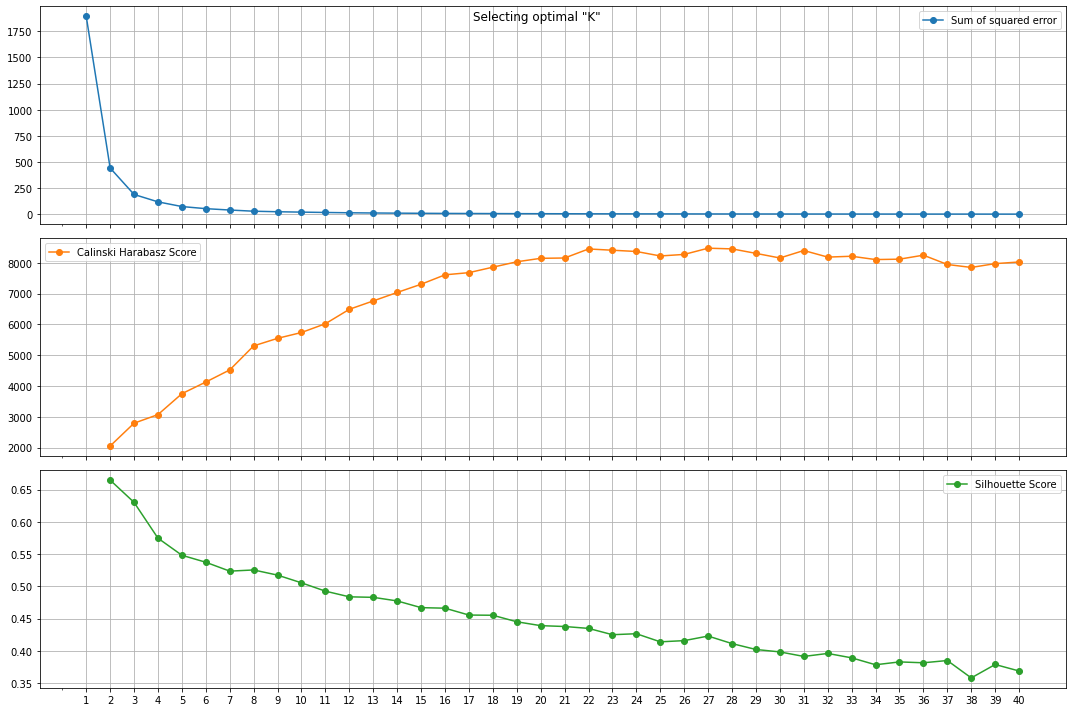

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 41)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [38]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''
# Sillhouette Score 따라 클러스터 d개로 분류

d=3

model = KMeans(n_clusters=d, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=3, random_state=312)

In [39]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [40]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [41]:
centroids

indeg    outdeg     eigen
0 -1.279842 -1.280119 -1.413289
1  1.085484  1.085985  1.029339
2 -0.379764 -0.380132 -0.237786

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.734


In [43]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.754862
1    0.726414
2    0.741418
Name: k_silhouette_coeff, dtype: float64

In [44]:
# 군집별 통계
data_prime.groupby('k_means_cluster').mean()

indeg    outdeg     eigen  k_silhouette_coeff
k_means_cluster                                                  
0               -1.279842 -1.280119 -1.413289            0.754862
1                1.085484  1.085985  1.029339            0.726414
2               -0.379764 -0.380132 -0.237786            0.741418

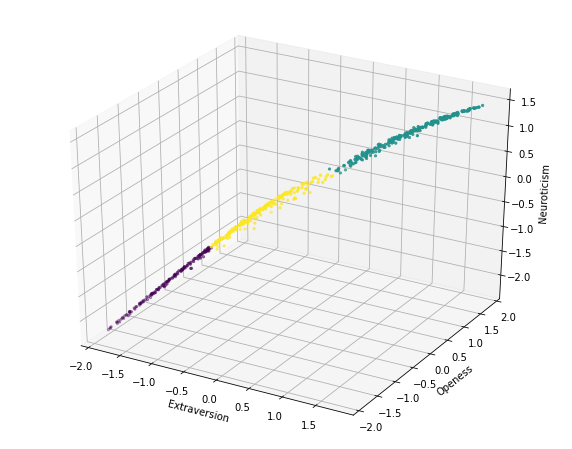

In [45]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_prime['indeg'], data_prime['outdeg'], data_prime['eigen'], s=5, c = data_prime['k_means_cluster'])
ax.set_xlabel('Extraversion', rotation=150)
ax.set_ylabel('Openess')
ax.set_zlabel(r'Neuroticism', rotation=60)
plt.show()

In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline


In [47]:
# raw data 바꿔가면서 분석
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터.csv', index_col = 0, encoding = 'cp949')
raw_data = raw_data.drop("REFYM", axis = 1)
raw_data

04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  05시-06시 하차인원  \
가능역                     377.0          16.0        7063.0        1651.0   
가락시장역                    71.0           5.0        5060.0        2621.0   
가산디지털단지역               1958.0          12.0       14462.0        8621.0   
가양역                      45.0           0.0       14182.0        1577.0   
가오리역                      7.0           1.0        2192.0         326.0   
가좌역                       1.0           0.0        2591.0         237.0   
가평역                       0.0           0.0         605.0         101.0   
간석역                     249.0           1.0        4574.0        1083.0   
갈매역                       2.0           0.0        1571.0         678.0   
강남구청역                    32.0           2.0        2834.0        2290.0   
강남역                     166.0           3.0        6685.0       10642.0   
강동구청역                     5.0           0.0        4604.0        1070.0   
강동역                     100.0           1.0        9998.0        1352.0   
강매역                       0.0           0.0        1801.0         240.0   
강변(동서울터미널)역              18.0           1.0        7942.0        1756.0   
개봉역                    1151.0           4.0       16987.0        5249.0   
개포동역                      8.0           1.0         835.0         870.0   
개화산역                      4.0           0.0        3811.0         356.0   
개화역                       4.0           0.0        1318.0         265.0   
거여역                       0.0           0.0        5055.0         486.0   
건대입구역                   235.0           8.0       16534.0        2950.0   
검암역                     366.0           8.0        5975.0         342.0   
경기광주역                     0.0           0.0        2402.0         285.0   
경마공원역                     3.0           0.0         333.0         381.0   
경복궁(정부서울청사)역             71.0           1.0        2242.0        1611.0   
경찰병원역                    16.0           0.0        2292.0         216.0   
고덕역                      22.0           0.0        3536.0        1519.0   
고려대(종암)역                 26.0           0.0        3417.0         807.0   
고속터미널역                  137.0           4.0        7450.0        6650.0   
고잔역                     214.0          11.0        5101.0         663.0   
곡산역                       0.0           0.0         207.0         154.0   
곤지암역                      1.0           0.0         649.0         150.0   
공항시장역                     5.0           0.0        3393.0         282.0   
공항화물청사역                   2.0           0.0         358.0         625.0   
과천역                       7.0           3.0        1994.0         339.0   
관악역                     129.0           3.0        7022.0        1730.0   
광명사거리역                  114.0           0.0       20389.0        5060.0   
광명역                       0.0          18.0           5.0        1184.0   
광흥창(서강)역                 11.0           0.0        2369.0        1318.0   
구로디지털단지역                189.0           4.0       35938.0        5067.0   
구로역                    9664.0          22.0       22090.0        4577.0   
구룡역                       3.0           0.0         303.0        1105.0   
구리역                     826.0          15.0        8746.0        1797.0   
구반포역                      0.0           0.0         229.0         215.0   
구산역                       2.0           0.0        4867.0         153.0   
구성역                      54.0           1.0        2144.0         371.0   
구의(광진구청)역                52.0           0.0       12341.0        1161.0   
구일역                     284.0           7.0        3583.0        1029.0   
구파발역                    115.0           3.0        9231.0        1338.0   
국수역                       1.0           0.0         481.0          39.0   
국회의사당역                    2.0           0.0         753.0        1679.0   
군자(능동)역                  57.0           3.0       14250.0        1804.0   
군포역                      39.0           1.

In [48]:
raw_data["승차인원"] = 0
raw_data["하차인원"] = 0
for i in range(0,len(raw_data.columns.tolist())):
  if i%2 == 0:
    raw_data["승차인원"] = raw_data["승차인원"] + raw_data.iloc[:,i]
  else:
    raw_data["하차인원"] = raw_data["하차인원"] + raw_data.iloc[:,i]
    
raw_data["유동인구"] = raw_data["승차인원"]+raw_data["하차인원"]

In [49]:
# 분석에 이용할 컬럼 바꾸고 싶으면 meaning list 수정
meaning_list_app = raw_data.columns.tolist()[48:]
meaning_list = ['유동인구', 'FAR', 'RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT', '단독주택', '공동주택', '제1종근린생활시설', '제2종근린생활시설', '업무시설', '의료시설', '교육연구시설', '공장','위험물저장및처리시설',	'동.식물관련시설',	'판매시설',	'숙박시설',	'운동시설',	'분뇨.쓰레기처리시설',	'자원순환관련시설',	'근린생활시설',	'방송통신시설',	'교육연구및복지시설',	'운수시설','판매및영업시설',	'위락시설',	'교정및군사시설',	'수련시설',	'장례시설',	'발전시설',	'공공용시설',	'관광휴게시설',	'야영장시설',	'묘지관련시설','다세대주택']
data= raw_data.loc[:, meaning_list]
data = data.dropna(axis=0)
data.head()

유동인구        FAR  RESDT_AREA_RT  COMRC_AREA_RT  \
가능역       3.258119e+06  14.190705          0.713          0.099   
가락시장역     1.594658e+07  40.378767          0.369          0.610   
가산디지털단지역  1.725928e+07  57.151795          0.040          0.064   
가양역       9.798902e+06  33.729441          0.801          0.179   
가오리역      3.799540e+06  22.184693          0.763          0.104   

          MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT    단독주택   공동주택  \
가능역                 0.189          0.000        0.000  1637.0  294.0   
가락시장역               0.021          0.000        0.000    32.0  201.0   
가산디지털단지역            0.032          0.864        0.000   242.0   33.0   
가양역                 0.011          0.009        0.000     1.0  214.0   
가오리역                0.131          0.000        0.001  1255.0  759.0   

          제1종근린생활시설  ...  위락시설  교정및군사시설  수련시설  장례시설  발전시설  공공용시설  관광휴게시설  \
가능역           246.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
가락시장역          65.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
가산디지털단지역       38.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
가양역            25.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
가오리역          251.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   

          야영장시설  묘지관련시설  다세대주택  
가능역         0.0     0.0    0.0  
가락시장역       0.0     0.0    0.0  
가산디지털단지역    0.0     0.0    0.0  
가양역         0.0     0.0    0.0  
가오리역        0.0     0.0    0.0  

[5 rows x 37 columns]

In [50]:
from sklearn.preprocessing import StandardScaler
scaled = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
scaled.mean(axis=0)

유동인구              -1.127846e-16
FAR                5.639228e-17
RESDT_AREA_RT     -7.250436e-17
COMRC_AREA_RT     -8.861644e-17
MIXBLDG_AREA_RT    4.833624e-17
INDST_AREA_RT     -2.819614e-17
ETC_AREA_RT       -6.243431e-17
단독주택               4.028020e-18
공동주택               2.416812e-17
제1종근린생활시설         -4.430822e-17
제2종근린생활시설         -2.416812e-17
업무시설              -3.222416e-17
의료시설               2.114711e-17
교육연구시설             1.208406e-17
공장                 3.826619e-17
위험물저장및처리시설         2.819614e-17
동.식물관련시설          -2.215411e-17
판매시설              -8.056040e-18
숙박시설               4.833624e-17
운동시설               2.416812e-17
분뇨.쓰레기처리시설         0.000000e+00
자원순환관련시설          -4.028020e-18
근린생활시설             8.056040e-18
방송통신시설             8.056040e-18
교육연구및복지시설         -2.014010e-17
운수시설               1.611208e-17
판매및영업시설            0.000000e+00
위락시설               2.416812e-17
교정및군사시설           -1.611208e-17
수련시설              -3.675568e-17
장례시설               8.056040e-18
발전시설    

In [51]:
y = scaled[['유동인구']]

dataset = scaled.drop(['유동인구'], axis=1)


In [52]:
dataset

FAR  RESDT_AREA_RT  COMRC_AREA_RT  MIXBLDG_AREA_RT  \
가능역              -0.369271       0.878698      -0.553417         1.658163   
가락시장역             0.258735      -0.536668       2.082444        -0.707749   
가산디지털단지역          0.660962      -1.890316      -0.733956        -0.552838   
가양역               0.099280       1.240768      -0.140758        -0.848577   
가오리역             -0.177571       1.084419      -0.527626         0.841360   
가좌역               0.929682       1.067961      -0.568892        -0.158519   
가평역              -0.662883      -0.561354      -0.568892        -0.947157   
간석역               0.182600       0.771722       0.163578        -0.144437   
갈매역              -0.291718       0.656518      -0.486360        -0.214851   
강남구청역             0.273444       0.574229       0.400857         0.080888   
강남역               1.317349      -0.787648       2.159818        -0.045857   
강동구청역            -0.026792       0.372622       0.070730         1.672245   
강동역               0.012466      -0.030592      -0.016960         3.291768   
강매역              -0.442083      -0.026478      -1.058925        -0.961239   
강변(동서울터미널)역       2.311648       1.166708      -0.047910        -0.707749   
개봉역               0.035363       0.969215      -0.006644        -0.271182   
개포동역             -0.557258       1.783873      -0.718481        -1.003488   
개화산역             -0.384918       0.051696      -0.439936        -0.186685   
개화역              -0.693531      -1.589963      -1.048608        -0.975322   
거여역              -0.297411       0.841668      -0.491518         0.404793   
건대입구역             2.703562       0.668861       0.070730         0.545621   
검암역              -0.545162      -1.050972      -0.697848        -0.876742   
경기광주역            -0.549653      -0.149911      -0.723639        -0.918991   
경마공원역            -0.644007      -1.647565      -0.883545        -0.749997   
경복궁(정부서울청사)역     -0.262638      -0.100538       0.999213         0.756863   
경찰병원역            -0.255090       0.446682       0.251268         0.925857   
고덕역               0.096536       0.742921      -0.419303        -0.792246   
고려대(종암)역          0.295856       0.471369      -0.532784         0.376627   
고속터미널역            1.499893      -0.084080       0.994055        -0.904908   
고잔역              -0.393083       0.096955       0.504022         1.432838   
곡산역              -0.698292      -1.902660      -1.064083        -0.961239   
곤지암역             -0.631654      -1.721625      -0.806171        -0.764080   
공항시장역            -0.424082       0.438453       0.189369         1.123016   
공항화물청사역           5.245358      -2.054894      -1.064083        -1.003488   
과천역              -0.258447       1.508206      -1.002184        -0.989405   
관악역              -0.286877      -0.639529      -0.811329        -0.186685   
광명사거리역           -0.082245       0.899270      -0.357404         0.461124   
광명역               4.063806      -1.898545      -0.120125         6.404068   
광흥창(서강)역         -0.096175       0.932185      -0.419303         0.278048   
구로디지털단지역          0.185769      -0.561354       0.390541         0.996271   
구로역               0.590883      -0.162254       0.983739        -0.158519   
구룡역              -0.428680       1.944336      -1.002184        -0.792246   
구리역              -0.189902       0.068154       1.195226        -0.355679   
구반포역             -0.054080       1.207852      -0.305822        -0.214851   
구산역              -0.216001       0.874583      -0.331613         1.066685   
구성역              -0.402354      -0.248657      -0.372879        -0.947157   
구의(광진구청)역        -0.136282       0.022895       0.968264         0.418876   
구일역              -0.151378       0.475483       0.390541        -0.933074   
구파발역             -0.540292      -0.964569      -1.007342        -1.003488   
국수역              -0.677560      -1.602306      -0.914494        -0.947157   
국회의사당역           -0.201722      -2.054894       4.094158        -1.003488   
군자(능동)역          -0

In [53]:
indexing_list = ['RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT']
dataset2= dataset.loc[:, indexing_list]

dataset2.head()

RESDT_AREA_RT  COMRC_AREA_RT  MIXBLDG_AREA_RT  INDST_AREA_RT  \
가능역            0.878698      -0.553417         1.658163      -0.318480   
가락시장역         -0.536668       2.082444        -0.707749      -0.318480   
가산디지털단지역      -1.890316      -0.733956        -0.552838       7.184683   
가양역            1.240768      -0.140758        -0.848577      -0.240322   
가오리역           1.084419      -0.527626         0.841360      -0.318480   

          ETC_AREA_RT  
가능역         -0.680762  
가락시장역       -0.680762  
가산디지털단지역    -0.680762  
가양역         -0.680762  
가오리역        -0.677109

In [54]:
data_prime = dataset2.copy()

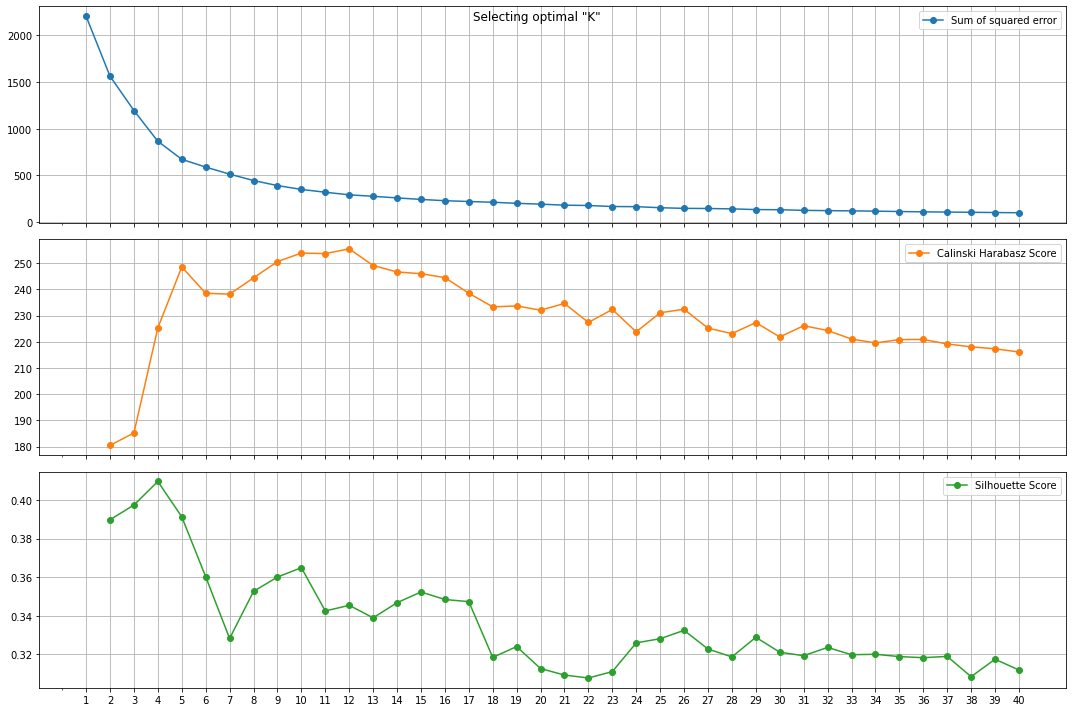

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

search_range = range(1, 41)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(data_prime)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(data_prime)
        chs = calinski_harabasz_score(data_prime, cluster)
        ss = silhouette_score(data_prime, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [56]:
from sklearn.cluster import KMeans
'''
init: {'k-means++', 'random'}, default='k-means++'
algorithm: {'auto', 'full', 'elkan'}, default='auto'
'''
# Sillhouette Score 따라 클러스터 d개로 분류

d=4

model = KMeans(n_clusters=d, random_state=312, algorithm='auto')
model.fit(data_prime)

KMeans(n_clusters=4, random_state=312)

In [57]:
# 각 군집(cluster) 표시
pred = model.predict(data_prime)
pred

array([0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 3, 0, 0, 0, 3, 3, 1, 1, 0, 2, 0, 1, 0, 3, 0, 3, 3, 0, 3, 0,
       0, 1, 3, 0, 1, 1, 3, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 3, 0, 0, 1,
       0, 2, 3, 3, 1, 0, 0, 3, 0, 1, 0, 1, 1, 3, 1, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       2, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1, 3, 1, 3, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 1, 0, 3, 3, 0, 0,
       0, 1, 0, 3, 1, 2, 3, 0, 1, 0, 1, 0, 0, 1, 3, 1, 0, 0, 3, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 1, 0, 0, 0, 3, 3, 3, 3, 0,
       1, 0, 0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 1, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 1, 0, 3, 0, 3,
       0, 0, 0, 1, 0, 1, 0, 0, 3, 3, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       3, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 1, 1,

In [58]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = data_prime.columns)

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score
data_prime['k_means_cluster'] = pred
data_prime['k_silhouette_coeff'] = silhouette_samples(data_prime, data_prime['k_means_cluster'])

k_average_score = silhouette_score(data_prime, data_prime['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.527


In [60]:
# 군집별 평균 silhouette_score 값
data_prime.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.564917
1    0.560312
2    0.444239
3    0.418406
Name: k_silhouette_coeff, dtype: float64

Text(0, 0.5, 'Commerical Areal')

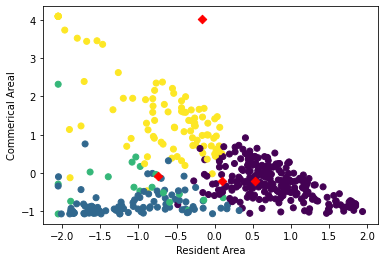

In [61]:
# 군집결과 시각화
plt.scatter(x=data_prime['RESDT_AREA_RT'], y=data_prime['COMRC_AREA_RT'], c=data_prime['k_means_cluster'])
plt.scatter(x=centroids.iloc[:,2], y=centroids.iloc[:,3], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
plt.xlabel('Resident Area')
plt.ylabel('Commerical Areal')

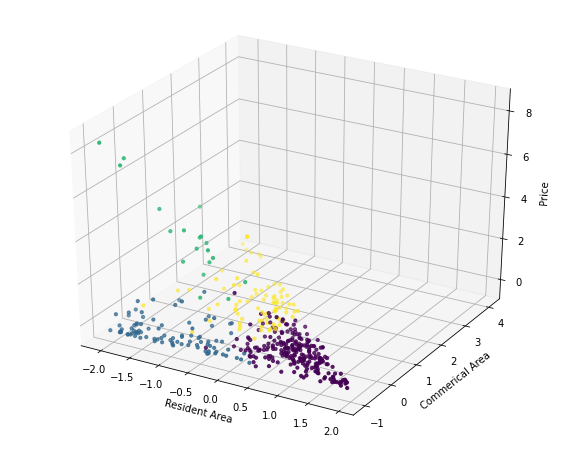

In [62]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(data_prime['RESDT_AREA_RT'], data_prime['COMRC_AREA_RT'], data_prime['INDST_AREA_RT'], s=10, c = data_prime['k_means_cluster'])
ax.set_xlabel('Resident Area', rotation=150)
ax.set_ylabel('Commerical Area')
ax.set_zlabel(r'Price', rotation=60)
plt.show()

In [63]:
index = data.index
index

Index(['가능역', '가락시장역', '가산디지털단지역', '가양역', '가오리역', '가좌역', '가평역', '간석역', '갈매역',
       '강남구청역',
       ...
       '화계역', '화곡역', '화랑대(서울여대입구)역', '화서역', '화전역', '화정역', '회룡역', '회현(남대문시장)역',
       '효창공원앞역', '흑석(중앙대입구)역'],
      dtype='object', length=441)

In [64]:
data_prime["역"] = index
data_prime = data_prime.set_index("역")

In [65]:
for i in range(0,d):
  cluster_df = data_prime.loc[data_prime["k_means_cluster"] == i, :]
  print(len(cluster_df.index.tolist()))
  # 마지막 줄 코드는 데이터 저장하는거, 나는 데이터가 다 저장되어서 주석 처리 해뒀어
  #cluster_df.to_csv(f'/content/drive/My Drive/Colab Notebooks/클러스터데이터{i}.csv', encoding = 'cp949')

238
93
19
91
